# Кватернионный регулятор обратной связи для вращения по собственной оси космического аппарата
### Вступление
#### Постановка задачи
Рассматривается вращение космического аппарата под действием закрепленных на корпусе крутящих устройств.
#### Вращение вокруг собственной оси
Если возникает необходимость измененить положение аппарата в пространстве, это можно сделать с помощью нескольких последовательных поворотов вокруг каждой из осей управления. В настоящее время в большинстве систем используется этот метод. Однако, существует более быстрый способ осуществления манёвра - поворот вокруг собственной оси. Из теоремы Эйлера известно, что угол поворота $\phi$ вокруг собственной оси меньше суммы трёх углов Эйлера и является кратчайшим угловым путём между двумя ориентациями.  
Здесь далее будем рассматривать переориентацию под большим углом, также будем считать идеальным управляющий крутящий момент.  

#### Основные идеи
1. Манёвр вращения вокруг собственной оси можно провести, используя кватернионный регулятор обратной связи. Задача сводится к правильному выбору матриц коэффициентов в уравнениях, описывающих движение.
2. Различные регуляторы можно исследовать на устойчивость и глобальную устойчивость.
3. Выведена функция Ляпунова, обеспечивающая достаточное условие глобальной стабильности регулятора. Этот результат помогает в выборе матриц коэффициентов.

### Теоретические сведения
Замкнутая система уравнений, описывающая данное вращение, в кватернионах имеет вид:
$$\left\{ 
\begin{array}\\
\dot{q} = \frac{1}{2} q \circ \omega \\
J\cdot\dot{\omega} = -\omega \times (J \cdot\omega + h) + T_{ctrl}\\
\dot{h} = -T_{ctrl}
\end{array}
\right. $$

Здесь векторная часть кватерниона $q$ характеризует направления оси Эйлера, скалярная - угол поворота вокруг неё. $J$ соответствует тензору инерции тела. $h$ - угловой момент, $T_{ctrl}$ - управляющий момент. Как видно, неизвестными здесь являются $q,\;, h,\;\omega$.  
Кватернионный регулятор обратной связи состоит из
- обратной связи, линейной по кватерниону ошибок;
- обратной связи, линейной по скорости;
- слагаемого, нелинейного по скорости.
Таким образом, вектор управляющего момента выражается следующим образом:  
$$
\overrightarrow u = -\Omega J \overrightarrow \omega - D \overrightarrow \omega - K \overrightarrow{q_e}
$$

Также, для программной реализации удобно переписать систему уравнений в несколько ином виде, отдельно записав векторную и скалярную части кватерниона.
$$
\left\{
\begin{array}\\
\dot{\overrightarrow{q}} = \frac12 \Omega \overrightarrow q + \frac 12 q_4 \overrightarrow \omega\\
J \dot{\overrightarrow{\omega}} = \Omega J \overrightarrow \omega - \mu \Omega J \overrightarrow \omega - D \overrightarrow \omega - K \overrightarrow q\\
\dot q_4 = -\frac12 \overrightarrow \omega^T\overrightarrow q
\end{array}
\right.
$$
Эта система содержит 7 неизвестных: $\overrightarrow q$ (3 компоненты), $q_4$ и $\overrightarrow \omega$. Здесь коэффициент $\mu = 1$ описывает ситуацию, когда управляющий момент полностью противодействует моменту гироскопической связи. $\mu = 0$ - когда присутствует только кватернионная обратная связь и линейная обратная связь по скорости.

#### Устойчивость системы
Считая матрицы $K^{-1}$ и $K^{-1}J$ существующими и положительно определёнными, вводится в рассмотрение функция Ляпунова:
$$
V = \frac12 \overrightarrow\omega^T K^{-1}J \overrightarrow \omega + q_1^2 + q_2^2 + q_3^2 + (q_4-1)^2,
$$
причём заметим, что она является положительно определённой и ассимптотически неограниченной по $\overrightarrow \omega$. Проведя некоторые преобразования и воспользовавшись уравнением движения, можно получить формулу:
$$
\dot V = -\overrightarrow\omega^T K^{-1}D \overrightarrow\omega +(1-\mu)\overrightarrow\omega^T K^{-1} \Omega J \overrightarrow\omega.
$$
Второе слагаемое желательно занулить. Сделать это можно двумя способами: $\mu = 1$ либо $K^{-1}=\alpha J + \beta I$. Первое условие не всегда можно обеспечить (оно означает полное отсутствие гироскопического момента). В таких случаях надо брать матрицу $K^{-1}=\alpha J + \beta I$, но тогда встаёт вопрос: какими должны быть коэффициенты $\alpha$ и $\beta$? Об этом чуть ниже.  

Проведя ещё некоторые преобразования, нетрудно получить:
$$
\dot V = -\overrightarrow \omega^T K^{-1}D \overrightarrow \omega.
$$
Отсюда видно, что глобальная устойчивость наблюдается только при положительной определённости матрицы $K^{-1}D$.

Из теории следует, что вращение вокруг оси Эйлера может быть достигнуто только с помощью  матрицы коэффициентов $K$, пропорциональной матрице инерции. Отсюда и из предыдущего утверждения следует, что $D =dJ,\;d>0$.  

Вернёмся к вопросу выбора коэффициентов $\alpha$ и $\beta$. В этом случае их выбор должен быть обусловлен сведением к минимуму "расстояния" между матрицей $K$ и матрицей инерции $J$.

### Численное моделирование
Как было сказано выше, основная сложность задачи состоит в выборе матриц коэффициентов. Проверим, что выбор матриц $D = dJ, k = kJ$ обеспечивает вращение вокруг собственной оси.  
####  Данные
Главные моменты инерции: $J_1 = 1200,\;J_2 = 2200,\;J_3 = 3100$.  
Начальные условия на кватернион: $ q(0) = \left({0.57, 0.57, 0.57, 0.159}\right)^T$, т.е. начальный угол равен $161.7^{\circ}$.  
Начальные условия на угловую скорость $\overrightarrow \omega(0) = (0.01, 0.01, 0.01)^T$ рад/с.  
Желаемое время переориентации 50 с.  
Матрицы коэффициентов $K = diag(60, 110, 155),\;D = 0.316\cdot diag(1200, 2200, 3100)$.  

In [ ]:
import numpy as np
from sympy import *
from scipy import interpolate
from matplotlib import pyplot as plt

#### Задание параметров сетки и исходных численных данных

In [44]:
N = 1001 # количество узлов сетки
T = 100 # время наблюдений
tau = T/N # шаг сетки

q = np.array([0.57, 0.57, 0.57])
q4 = 0.159
omega = np.array([0.01, 0.01, 0.01])
k = 0.05
d = 0.316
J = np.diag([1200, 2200, 3100])

#### Функции итерации на следующий шаг

In [45]:
def Omega(omega):
    return np.array([[0, -omega[2], omega[1]],
                     [omega[2], 0, -omega[0]],
                     [-omega[1], omega[0], 0]])

def q_next(q, q4, omega):
    return q + tau * (1/2 * Omega(omega) @ q + 1/2 * q4 * omega)

def q4_next(q, q4, omega):
    return q4 + tau * (-1/2 * omega @ q)

def omega_next(q, q4, omega):
    return omega + tau * (-d*omega - k*q)

#### Расчёт
Имеем систему вида $\frac{df}{dt} = g(t)$. Решаем её явным методом Эйлера, т.е. разностной схемой $\frac{f^{n+1}-f^n}{\tau}= g(t^n)$. Схема первого порядка, но в данном случае нам важно лишь провести оценку, так что результат вполне устроит.

In [46]:
q_arr, q4_arr, omega_arr, t_arr = [], [], [], []

for i in range(N):
    q_arr.append(q)
    q4_arr.append(q4)
    omega_arr.append(omega)
    t_arr.append(tau*i)
    
    q_n = q_next(q, q4, omega)
    q4_n = q4_next(q, q4, omega)
    
    omega_n = omega_next(q, q4, omega)
    q, q4, omega = q_n, q4_n, omega_n
    
q_arr4, q4_arr4, omega_arr4 = np.array(q_arr), np.array(q4_arr), np.array(omega_arr)

#### Вычисление управляющего момента

In [78]:
def u_calc(omega_arr, q_arr):
    u = []
    for i in range(len(omega_arr)):
        u.append((-Omega(omega_arr[i])@J-d)@omega_arr[i] - k*q_arr[i])
    return np.array(u)

#### Вспомогательные функции для визуализации

In [94]:
# визуализирует зависимости каждой из компонент кватерниона от времени
def quaternion_plot(q_arr, q4_arr):
    q_arr = np.array(q_arr)

    fig, ax = plt.subplots(2, 2, figsize = (10, 6))

    ax[0][0].plot(t_arr, q_arr[:, 0], color = 'darkblue')
    ax[0][0].set_title('$q_1$')

    ax[0][1].plot(t_arr, q_arr[:, 1], color = 'darkblue')
    ax[0][1].set_title('$q_2$')

    ax[1][0].plot(t_arr, q_arr[:, 2], color = 'darkblue')
    ax[1][0].set_title('$q_3$')

    ax[1][1].plot(t_arr, q4_arr, color = 'darkblue')
    ax[1][1].set_title('$q_4$')


    for i in range(2):
        for j in range(2):
            ax[i][j].set_xlim((0, 100))
            ax[i][j].grid()

    plt.show()
    
# визуализирует зависимости каждой из компонент угловой скорости от времени
def omega_plot(omega_arr):
    omega_arr = np.array(omega_arr)
    # если нужно построить 3 графика
    '''
    _, ax = plt.subplots(3, 1, figsize = (5, 10))

    ax[0].plot(t_arr, omega_arr[:, 0], color = 'darkblue')
    ax[0].set_title('$\omega_1$')

    ax[1].plot(t_arr, omega_arr[:, 1], color = 'darkblue')
    ax[1].set_title('$\omega_2$')

    ax[2].plot(t_arr, omega_arr[:, 2], color = 'darkblue')
    ax[2].set_title('$\omega_3$')

    for _ in ax:
        _.set_xlim((0, 100))
        _.grid()
    '''
    
    # Построим только один график
    fig, ax = plt.subplots(1, 1)
    ax.plot(t_arr, omega_arr[:, 0], color = 'darkblue')
    ax.set_title('$\omega_1$')
    ax.grid()

    plt.show()
    
# визуализирует, как зависят друг от друга различные компоненты векторной части кватерниона (т.е. направления оси Эйлера)
def qq_plot(q_arr):
    q_arr = np.array(q_arr)
    _, ax = plt.subplots(2, 2, figsize = (10, 10))

    f = q_arr[:, 1] >= 0
    g = q_arr[:, 1][f] <= 0.5
    ax[0][0].plot(q_arr[:, 0][f][g], q_arr[:, 1][f][g], color = 'darkblue')
    ax[0][0].set_xlabel('$q_1$')
    ax[0][0].set_ylabel('$q_2$')

    f = q_arr[:, 2] >= 0
    g = q_arr[:, 2][f] <= 0.5
    ax[0][1].plot( q_arr[:, 1][f][g], q_arr[:, 2][f][g], color = 'darkblue')
    ax[0][1].set_xlabel('$q_2$')
    ax[0][1].set_ylabel('$q_3$')

    f = q_arr[:, 0] >= 0
    g = q_arr[:, 0][f] <= 0.5
    ax[1][0].plot( q_arr[:, 2][f][g], q_arr[:, 0][f][g], color = 'darkblue')
    ax[1][0].set_xlabel('$q_3$')
    ax[1][0].set_ylabel('$q_1$')

    for _ in ax[0]:
        _.grid()

    for _ in ax[1]:
        _.grid()


    plt.show()
    
# визуализирует зависимость i-й компоненты вектора управляющего моментв от времени
def u_plot(number):
    u = []
    for i in range(len(omega_arr)):
        u.append((-Omega(omega_arr[i])@J-d)@omega_arr[i] - k*q_arr[i])
    u = np.array(u)

    fig, ax = plt.subplots(1, 1)
    ax.plot(t_arr[10:], np.array(u[:, number-1][10:])*30, color = 'darkblue')
    ax.grid()
    ax.set_title('$u_' + str(number) + '$')
    ax.set_xlim((10, 100))
    ax.set_ylim((-160, 10))
    
# визуализирует зависимость угла поворота по собственной оси от времени
def eigenangle_plot(q4_arr):
    q4_ = q4_arr/np.max(q4_arr)
    plt.plot(t_arr[:int(N/2)], np.rad2deg(np.arccos(q4_)*2)[:int(N/2)], color = 'darkblue')
    plt.grid()
    plt.title('eigen angle')
    plt.xlim(0, T/2)

#### Эволюция кватерниона во времени

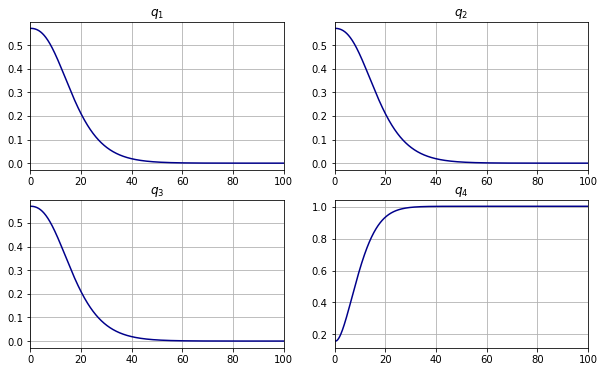

In [95]:
quaternion_plot(q_arr, q4_arr)

#### Эволюция угловой скорости во времени
В данном случае все компоненты угловой скорости одинаковы в каждый момент времени, потому что так были заданы начальные данные (поэтому здесь приведён только один график). Но, вообще говоря, это не так.

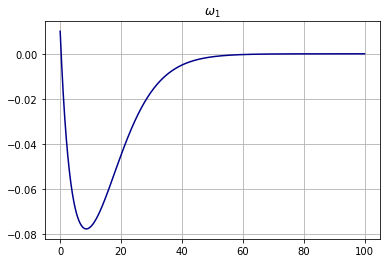

In [96]:
omega_plot(omega_arr)

#### Графики компонент вектора направления оси Эйлера в зависимости друг от друга

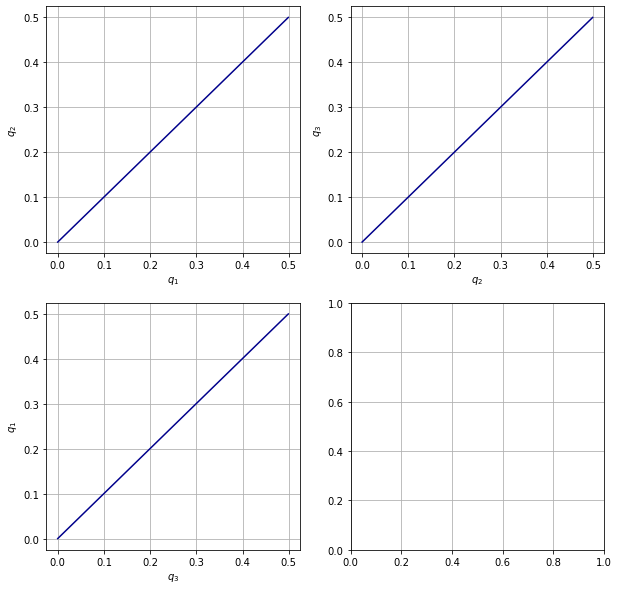

In [90]:
qq_plot(q_arr)

#### Эволюция вектора управляющего момента
Для всех компонент схожая картина, поэтому приведём только график для компоненты по первой оси управления.

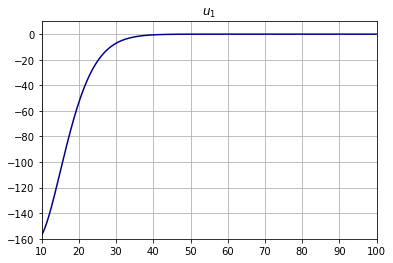

In [97]:
u = u_calc(omega_arr, q_arr)
u_plot(1)

#### Эволюция угла поворота вокруг собственной оси во времени
Значение угла $\phi$ в каждый момент времени можно получить, используя соотношение $q_4 = \cos \frac{\phi}2$.

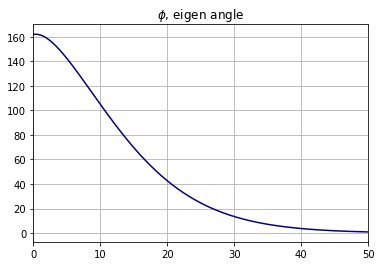

In [98]:
def eigenangle_plot(q4_arr):
    q4_ = q4_arr/np.max(q4_arr)
    plt.plot(t_arr[:int(N/2)], np.rad2deg(np.arccos(q4_)*2)[:int(N/2)], color = 'darkblue')
    plt.grid()
    plt.title('$\phi$, eigen angle')
    plt.xlim(0, T/2)
    
eigenangle_plot(q4_arr)

### Анализ результатов. Выводы
Проведённый расчёт показывает, что выбранные матрицы коэффициентов $D$ и $K$ обеспечивают идеальное вращение по собственной оси.  

Это хорошо визуализируют графики зависимости $q_i(q_j),\;{i, j \in \{1, 2, 3\}}$. Видно, что в каждый момент времени значения всех компонент направляющего вектора оси Эйлера равны друг другу. Это соответствует движению по прямой линии, а значит, такой манёвр действительно позволяет осуществить кратчайший путь из одной ориентации в другую. Если брать другие коэффициенты, то на графиках $q_i(q_j)$ будет наблюдаться отклонение от прямой линии. 

Как нетрудно проследить из графика угловой скорости, к моменту времени $50$с переориентация уже произведена, и все компоненты приближаются к нулевому значению. То же следует и из графика управляющего момента, и из графика зависимости собственного угла от времени.

В итоге, проверено теоретическое утверждение, что матрицы коэффициентов, пропорциональные матрице инерции, способны обеспечить поворот вокруг собственной оси на большой угол (в смоделированном примере - $161.7^{\circ}$).

При таком выборе матриц выполняется условие глобальной устойчивости, что было показано выше при помощи функции Ляпунова.